In [ ]:
#CIND820- Initial Code By Zion Yitbarek (500883564)
#Import libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_absolute_error, r2_score

# Saving dataset to Google Colab
df_ml.to_csv('retail_strategy_data.csv', index=False)
print("File saved: retail_strategy_data.csv")

File saved: retail_strategy_data.csv


In [ ]:

# Inditex Group figures for CapEx Intensity and Gross Margin are assigned to both Zara and Massimo Dutti.
# Final Validated Dataset (observations: 2018-2023)
data = {
    'Brand': ['Zara', 'Massimo Dutti', 'Brunello Cucinelli'] * 6,
    'Year': sorted([2018] * 3 + [2019] * 3 + [2020] * 3 + [2021] * 3 + [2022] * 3 + [2023] * 3),
  'Revenue_M': [
        18021, 1802, 529.996,  # 2018
        19564, 1900, 607.761,  # 2019
        14129, 1197, 544.013,  # 2020
        19586, 1653, 712.179,  # 2021
        23761, 1593, 919.708,  # 2022
        26050, 1839, 1139.42   # 2023
    ],
#Core Financial Features (X)
    'Gross_Margin_Pct': [43.3, 43.3, 84.1, #2018
                         44.1, 44.1, 88.1, #2019
                         44.1, 44.1, 89.79, #2020
                         42.9, 42.9, 84, #2021
                         43, 43, 89.61, #2022
                         42.2, 42.2, 90], #2023

    'CapEx_M': [            1609, 1609, 45,   #2018
                            1130, 1130, 52.6, #2019
                            713, 713, 51.6, #2020
                            1100, 1100, 61.6, #2021
                            1400, 1400, 87.5, #2022
                            1870, 1870, 79.1] #2023
}

df = pd.DataFrame(data)
df['Is_Luxury'] = df['Brand'].apply(lambda x: 1 if x == 'Brunello Cucinelli' else 0)

# Feature Engineering: Current Year's Growth (used as a feature)
df['YoY_Growth_Rate'] = df.groupby('Brand')['Revenue_M'].pct_change() * 100

# Target Variable (Y): Next Year's Growth (Measure of Resilience)
df['Target_Next_Year_Growth'] = df.groupby('Brand')['YoY_Growth_Rate'].shift(-1)




In [ ]:
# Stating the three required machine learning algorithms I am using.
models = {
    "Linear Regression (Baseline)": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

# Defined the Cross-Validation
cv = KFold(n_splits=4, shuffle=True, random_state=42)
results = []
# Looping through models to observe performance (MAE and R2)
for name, model in models.items():
    # Mean Absolute Error (MAE) and R-squared (R2)
    mae_scores = cross_val_score(model, X, Y, cv=cv, scoring='neg_mean_absolute_error')
    r2_scores = cross_val_score(model, X, Y, cv=cv, scoring='r2')

    mean_mae = -mae_scores.mean()
    mean_r2 = r2_scores.mean()

    results.append({
        'Algorithm': name,
        'Cross-Validated MAE': f"{mean_mae:.2f}",
        'Cross-Validated R2': f"{mean_r2:.2f}"
    })

# Display the results
results_df = pd.DataFrame(results)

print("--- Table 1: Comparative Cross-Validation Results ---")
print(results_df.to_markdown(index=False))

rf_model = models["Random Forest Regressor"]
rf_model.fit(X, Y)
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

print("\n--- Table 2: Random Forest Feature Importance (Insights) ---")
print(feature_importances.to_markdown(numalign="left", stralign="left"))


--- Table 1: Comparative Cross-Validation Results ---
| Algorithm                    |   Cross-Validated MAE |   Cross-Validated R2 |
|:-----------------------------|----------------------:|---------------------:|
| Linear Regression (Baseline) |                 70.92 |               -30.93 |
| Random Forest Regressor      |                 16.8  |                 0.15 |
| Gradient Boosting Regressor  |                 15.99 |                -0.58 |

--- Table 2: Random Forest Feature Importance (Insights) ---
|                  | 0         |
|:-----------------|:----------|
| CapEx_M          | 0.439503  |
| YoY_Growth_Rate  | 0.391694  |
| Gross_Margin_Pct | 0.145708  |
| Is_Luxury        | 0.0230942 |


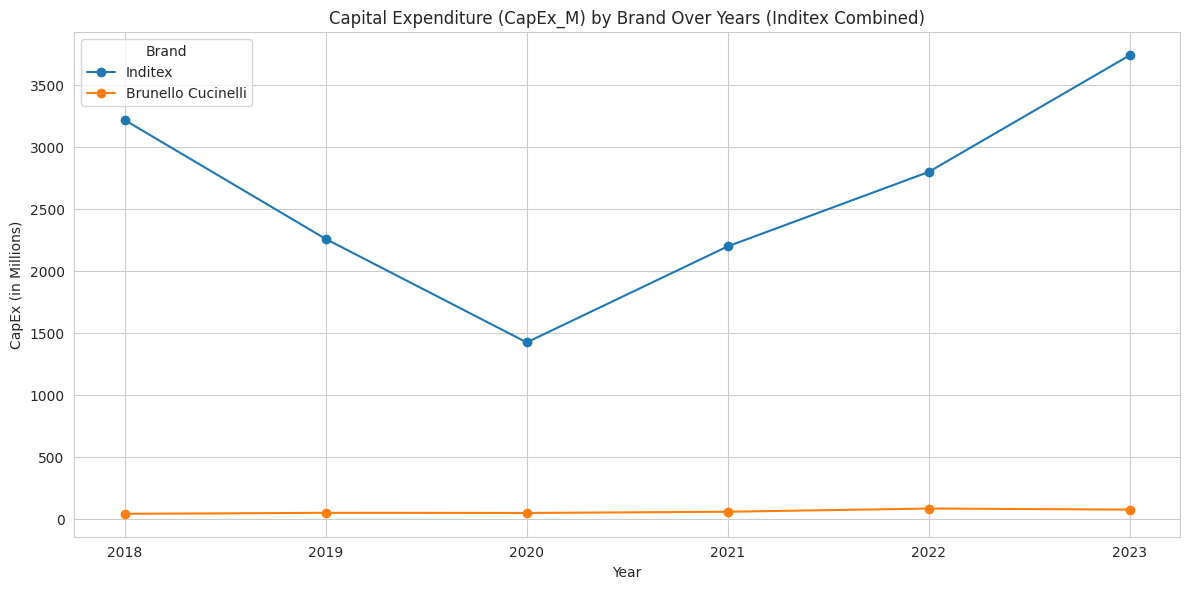

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Inditex Group figures for CapEx Intensity and Gross Margin are assigned to both Zara and Massimo Dutti.
# Final Validated Dataset (observations: 2018-2023)
data = {
    'Brand': ['Zara', 'Massimo Dutti', 'Brunello Cucinelli'] * 6,
    'Year': sorted([2018] * 3 + [2019] * 3 + [2020] * 3 + [2021] * 3 + [2022] * 3 + [2023] * 3),
  'Revenue_M': [
        18021, 1802, 529.996,  # 2018
        19564, 1900, 607.761,  # 2019
        14129, 1197, 544.013,  # 2020
        19586, 1653, 712.179,  # 2021
        23761, 1593, 919.708,  # 2022
        26050, 1839, 1139.42   # 2023
    ],
#Core Financial Features (X)
    'Gross_Margin_Pct': [43.3, 43.3, 84.1, #2018
                         44.1, 44.1, 88.1, #2019
                         44.1, 44.1, 89.79, #2020
                         42.9, 42.9, 84, #2021
                         43, 43, 89.61, #2022
                         42.2, 42.2, 90], #2023

    'CapEx_M': [            1609, 1609, 45,   #2018
                            1130, 1130, 52.6, #2019
                            713, 713, 51.6, #2020
                            1100, 1100, 61.6, #2021
                            1400, 1400, 87.5, #2022
                            1870, 1870, 79.1] #2023
}

df = pd.DataFrame(data)
df['Is_Luxury'] = df['Brand'].apply(lambda x: 1 if x == 'Brunello Cucinelli' else 0)

# Feature Engineering: Current Year's Growth (used as a feature)
df['YoY_Growth_Rate'] = df.groupby('Brand')['Revenue_M'].pct_change() * 100

# Target Variable (Y): Next Year's Growth (Measure of Resilience)
df['Target_Next_Year_Growth'] = df.groupby('Brand')['YoY_Growth_Rate'].shift(-1)

# Aggregate Zara and Massimo Dutti into 'Inditex'
inditex_capex = df[df['Brand'].isin(['Zara', 'Massimo Dutti'])].groupby('Year')['CapEx_M'].sum().reset_index()
inditex_capex['Brand'] = 'Inditex'

# Get data for Brunello Cucinelli
brune_capex = df[df['Brand'] == 'Brunello Cucinelli'][['Year', 'CapEx_M', 'Brand']]

# Combine the aggregated Inditex data and Brunello Cucinelli data
plot_df = pd.concat([inditex_capex, brune_capex], ignore_index=True)

# Set plot style
sns.set_style("whitegrid")

plt.figure(figsize=(12, 6))

# Plot CapEx_M for each brand over the years from the new plot_df
for brand in plot_df['Brand'].unique():
    brand_data = plot_df[plot_df['Brand'] == brand]
    plt.plot(brand_data['Year'], brand_data['CapEx_M'], marker='o', label=brand)

plt.title('Capital Expenditure (CapEx_M) by Brand Over Years (Inditex Combined)')
plt.xlabel('Year')
plt.ylabel('CapEx (in Millions)')
plt.xticks(df['Year'].unique())
plt.legend(title='Brand')
plt.grid(True)
plt.tight_layout()
plt.show()